In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt


In [2]:
df_origin = pd.read_csv("../data/processed/edges_and_weight.csv")
df_origin.head(3)

,weight,source,target
0,2,2910,3600
1,5,3600,4920
2,4,4920,2910


In [8]:
# df = df_origin.copy()
# df['weight'] = (df['weight']-df["weight"].min()) / (df['weight'].max()-df["weight"].min())
# df

,weight,source,target
0,0.000371,2910,3600
1,0.001483,3600,4920
2,0.001112,4920,2910
3,0.001483,2910,4600
4,0.004449,4600,4220
...,...,...,...
15435,0.000000,50,150
15436,0.000000,4050,2750
15437,0.000000,9350,9310
15438,0.000000,9140,4700


In [3]:
G = nx.DiGraph()

for i in range(df_origin.shape[0]):
    G.add_edge(df_origin.loc[i,'source'], df_origin.loc[i,'target'], weight=df_origin.loc[i,'weight'])


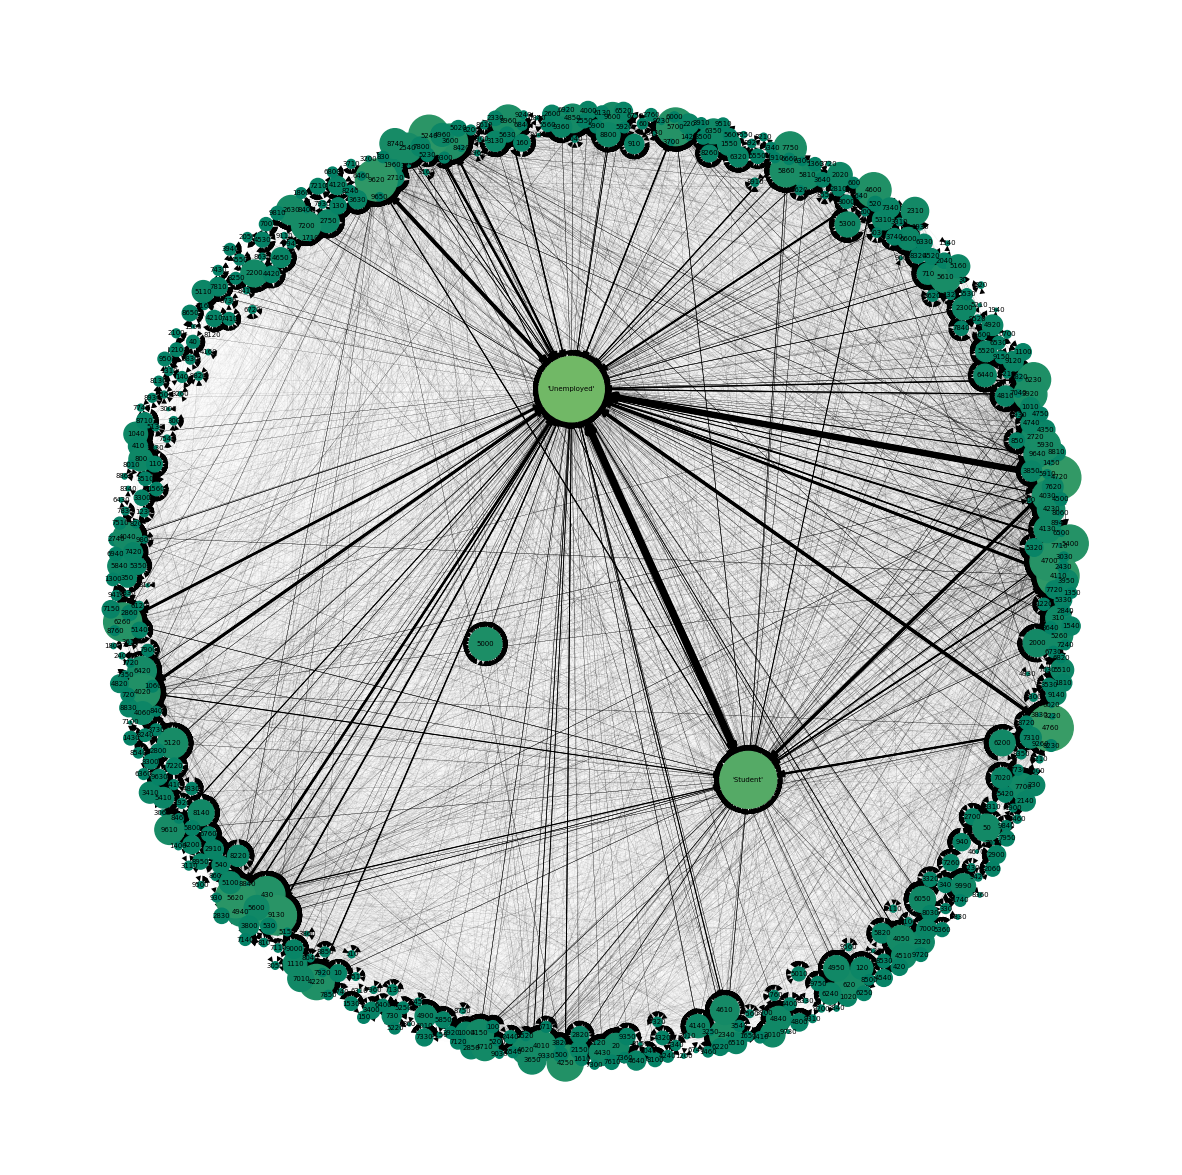

In [35]:
cmap_n = plt.colormaps.get_cmap("summer")
colors_n = [cmap_n(val/1000) for val in dict(G.in_degree).values()]
node_size=[val*5 for val in dict(G.in_degree).values()]
edge_thickness = [(val[2]/1000)*2 for val in G.edges.data("weight")]

fig, ax = plt.subplots()
fig.set_size_inches(15, 15)

nx.draw(
        G,
	    node_color=colors_n,
	    # edge_color=colors_e,
        # edgecolors="black",
	    node_size=node_size, 
	    width=edge_thickness,
	    with_labels=True,
        font_color="black",
        font_size=5,
	    pos=nx.spring_layout(G, k=500*1./np.sqrt(len(G.nodes)), iterations=100),
        ax=ax
    )
plt.show()

In [20]:
import nx_tools as nxt
from importlib import reload
reload(nxt)

nxt.network_summary(G)

GENERAL
	number of nodes: 499
	number of edges: 15440
	is_directed: True
	is_weighted: True
IN-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.06213229672195796
	median: 0.03413654618473895
	max: 0.8875502008032128
	top nodes: ["'Unemployed'", "'Student'", '4760', '4720', '4110', '9620', '5240', '5620', '9130', '4700']
	           [0.8875502008032128, 0.6706827309236947, 0.4417670682730923, 0.393574297188755, 0.36746987951807225, 0.36345381526104414, 0.3433734939759036, 0.3333333333333333, 0.323293172690763, 0.3012048192771084]
OUT-DEGREE (NORMALIZED)
	min: 0.0
	mean: 0.06213229672195797
	median: 0.03012048192771084
	max: 0.8855421686746987
	top nodes: ["'Unemployed'", "'Student'", '4760', '4720', '9620', '4110', '5620', '5240', '9130', '4020']
	           [0.8855421686746987, 0.6907630522088353, 0.5180722891566265, 0.46787148594377503, 0.4618473895582329, 0.4357429718875502, 0.4196787148594377, 0.40361445783132527, 0.34136546184738953, 0.33935742971887545]
DENSITY: 0.06213229672195797
AVERAGE 

In [13]:
nx.degree_centrality(G)

{'2910': 0.18875502008032127,
 '3600': 0.5100401606425702,
 '4920': 0.18875502008032127,
 '4600': 0.536144578313253,
 '4220': 0.5160642570281124,
 '2700': 0.10240963855421686,
 '1040': 0.2570281124497992,
 '2850': 0.15261044176706826,
 '1110': 0.2610441767068273,
 '2630': 0.34538152610441764,
 '430': 0.4277108433734939,
 "'Student'": 1.36144578313253,
 '2720': 0.3433734939759036,
 '9130': 0.6646586345381525,
 '2710': 0.12048192771084336,
 '6230': 0.4698795180722891,
 '340': 0.08032128514056225,
 '200': 0.022088353413654616,
 "'Unemployed'": 1.7730923694779115,
 '5810': 0.37349397590361444,
 '1960': 0.17670682730923692,
 '4940': 0.37751004016064255,
 '5700': 0.6305220883534136,
 '5400': 0.6084337349397589,
 '4650': 0.17469879518072287,
 '2200': 0.2710843373493976,
 '2760': 0.07429718875502007,
 '9620': 0.825301204819277,
 '4250': 0.5261044176706827,
 '8950': 0.1004016064257028,
 '410': 0.11646586345381525,
 '4760': 0.9598393574297188,
 '2740': 0.08835341365461846,
 '2600': 0.14658634538

In [14]:
nx.closeness_centrality(G)

{'2910': 0.49719932361023045,
 '3600': 0.5517983147543445,
 '4920': 0.49877440066496187,
 '4600': 0.5517983147543445,
 '4220': 0.5524436929002561,
 '2700': 0.48694779116465864,
 '1040': 0.5073462485818677,
 '2850': 0.4998300078621364,
 '1110': 0.5068018856542048,
 '2630': 0.5265767641356955,
 '430': 0.5596437884238376,
 "'Student'": 0.7403438204227569,
 '2720': 0.5219219419112916,
 '9130': 0.5781387483839888,
 '2710': 0.4925332194261928,
 '6230': 0.5447974134137472,
 '340': 0.4844506230048399,
 '200': 0.47045752732043716,
 "'Unemployed'": 0.8928910348387881,
 '5810': 0.5207710666259304,
 '1960': 0.5035600825476747,
 '4940': 0.5230779152045614,
 '5700': 0.5663541455991834,
 '5400': 0.5643242024249927,
 '4650': 0.49772324281319164,
 '2200': 0.5184844757735663,
 '2760': 0.4819789361527744,
 '9620': 0.5911631507255555,
 '4250': 0.5556933616820222,
 '8950': 0.485945840977077,
 '410': 0.4945961857902816,
 '4760': 0.6247875098276705,
 '2740': 0.4809973089915671,
 '2600': 0.4945961857902816,
 

In [15]:
nx.betweenness_centrality(G)

{'2910': 0.0006405103636780668,
 '3600': 0.0061375152126994775,
 '4920': 0.0017501230780605029,
 '4600': 0.006550045755883149,
 '4220': 0.006121561151270539,
 '2700': 6.057071178692572e-05,
 '1040': 0.002928267856175476,
 '2850': 0.00033035803027756154,
 '1110': 0.0014080071547622032,
 '2630': 0.007161941068498677,
 '430': 0.005218700410167458,
 "'Student'": 0.12597348735379446,
 '2720': 0.002221826445736565,
 '9130': 0.015888689069036045,
 '2710': 0.00016499853894550668,
 '6230': 0.006816092452876508,
 '340': 4.6039705638774996e-05,
 '200': 5.853371265635671e-06,
 "'Unemployed'": 0.35224315982280896,
 '5810': 0.002697988688013617,
 '1960': 0.0005817069706350658,
 '4940': 0.0026465584082036595,
 '5700': 0.014411226656130136,
 '5400': 0.011200993433534057,
 '4650': 0.0009697660552782409,
 '2200': 0.0019340860086506325,
 '2760': 0.0007261228920436013,
 '9620': 0.02675763894879112,
 '4250': 0.012831204820706113,
 '8950': 0.00012771256056861118,
 '410': 0.00010657884476931184,
 '4760': 0.0